# Ridge, Lasso regression
### Борунов Семён Сергеевич НММбд-01-22

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\lol14\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df =  pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [3]:
df.value_counts('CancellationCode')

CancellationCode
A    563
B    549
C    299
dtype: int64

Самая частая причина отмены "А", это всяческие обработки самолета и задержки персонала.

**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [4]:
print(f'min: {df["Distance"].min()} \nmean: {df["Distance"].mean()} \nmax: {df["Distance"].max()}')

min: 31 
mean: 724.5082571428571 
max: 4962


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

Минимальное расстояние 31*1,61 = 49,89 км   
Действительно, для самолета это расстояние вообще смехотворне

In [5]:
df[df['Distance'] == 31]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Во-первых, все эти рейсы имеют номера 64 и 65. Среди них есть как отмененные, так и не отмененные. Очень много пропущенных значений.  
Часть этих дат связана с войной в Осетии, но какой-то действительно системы я не обнаружил.

In [6]:
sorted(df[(df['FlightNum'] == 65)]['Distance'].unique())

[31, 82, 123, 281, 372, 386, 571, 581, 680, 682, 1005, 1747, 2454]

In [7]:
sorted(df[(df['FlightNum'] == 64)]['Distance'].unique())

[31, 82, 123, 359, 372, 414, 533, 571, 680, 883, 1005, 1747, 2381]

Судя по всему это очень схожие рейсы, ведь много расстояний совпадают (вряд ли же аэропорты распологают по окружностям с центром в одном городе?)  
***
при последующем изучении выяснилось, что это короткое расстояние мужду аэропортами на материке и острове Врангеля, куда можно попасть только самолетом

**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [8]:
dest = df.groupby('Dest')
dest.size().idxmax(), dest.size()["ATL"]

('ATL', 4280)

Это аэропорт в городе Атланта,  Джорджия, США.

**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [9]:
dest.mean()['AirTime']

Dest
ABE    76.325581
ABI    32.375000
ABQ    91.491139
ABY    26.600000
ACK    52.000000
         ...    
WYS    63.000000
XNA    81.262411
YAK    37.642857
YKM    91.000000
YUM    44.575758
Name: AirTime, Length: 299, dtype: float64

In [10]:
dest.mean()['AirTime'].idxmax(), dest.mean()['AirTime']['SJU']

('SJU', 185.31147540983608)

**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [11]:
dest = dest.filter(lambda x: len(x) >= 1000)
delayd = dest[dest['DepDelay'] > 0]
(delayd.groupby('Dest').size() / dest.groupby('Dest').size()).max()

0.48959881129271915

In [12]:
(delayd.groupby('Dest').size() / dest.groupby('Dest').size()).idxmax()

'EWR'

И наш победитель Newark International в Нью-Джерси.

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

Пропущенные данные мы обнаружили еще на этапе **3.**

In [13]:
df.isnull().sum().sum()

355215

Это количество пустых ячеек. Правда это с учетом специально пустых ячеек (например `CancellationCode` у неотмененного рейса не имеет смысла, поэтому он `NaN`)

In [14]:
len(df[df.isnull().sum(axis=1) > 0])

70000

Не уж-то действительно в каждой строке есть пропуск? Вообще похоже на то, потому что неотмененного рейса нет кода отмены, а у отмененного нет времени прибытия, например. 

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
df[df.isnull()['DepDelay']].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Кажется это все отмененные рейсы, давайте убедимся в этом

In [16]:
df[df.isnull()['DepDelay'] & df['Cancelled'] == 1].shape, df[df.isnull()['DepDelay']].shape

((1399, 29), (1399, 29))

Действительно, одинаковые выборки  
В связи с этим можно не учитывать все колонки, связанные с отменой рейсов (`Cancelled`, `CancellationCode`, `Diverted`)

In [17]:
sum(df['DepDelay'].isna())

1399

In [18]:
df = df.drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1)
df = df.drop(np.where(df['DepDelay'] == 0)[0])
df = df.dropna(subset='DepDelay')

df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,MDW,CLE,307,3.0,8.0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,IAH,AVL,834,4.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,MDW,TPA,997,4.0,9.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,SLC,FCA,532,4.0,19.0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,LAS,AUS,1090,4.0,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,CVG,BDL,661,12.0,13.0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ORD,ATL,606,22.0,20.0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,ORD,GRR,137,4.0,13.0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,RSW,MSP,1416,20.0,22.0,0.0,0.0,15.0,0.0,6.0


**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [19]:
for feach in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]:
    df[feach + '_Hour'] = df[feach] // 100
    df[feach + '_Minute'] = df[feach] % 100
    df = df.drop(feach, axis=1)
df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0


И раз мы закончили исключать из наших данных объеты, можно разделить наши данные на матрицу Х и вектор у

In [20]:
X = df.drop("DepDelay", axis=1)
y = df["DepDelay"]

**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Исключить стоит колонки со словом Delay, тк это разбиение всей задержки по различным причанам и при сложении они как раз должны дать целевую переменную 

In [21]:
X = X.drop(['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
           'TailNum', 'Year'], axis=1)
X.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,TaxiIn,TaxiOut,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,3.0,8.0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,4.0,12.0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,4.0,9.0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,4.0,19.0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,4.0,8.0,8.0,15.0,8,20,12.0,43.0,13,0


**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

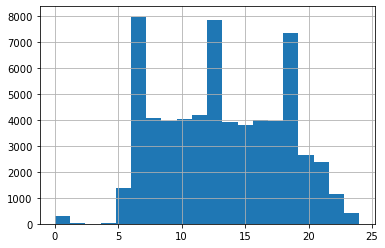

In [22]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

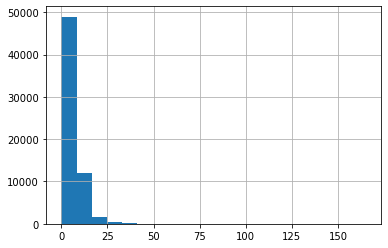

In [23]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

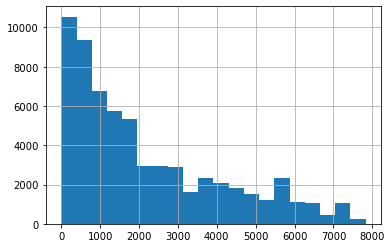

In [24]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

признаки имеют принципиальную разницу в порядках. Это может повлечь очень разные по модуюлю веса, или даже они могут где-то упереться в машинную точность (например `FlightNum` имеет огромные абсолютные значения и чтобы их как-то уравновесить могут появиться _очень_ маленькие веса)

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
def transform_data(data):
    numeric_data = data.select_dtypes([np.number])
    numeric_features = numeric_data.columns
    
    data = data.fillna(0)
    
    data[numeric_features] = StandardScaler().fit_transform(data[numeric_features])

    categorical = list(data.dtypes[data.dtypes == "object"].index)
    data[categorical] = data[categorical].fillna("NotGiven")
    
    for cat in categorical:
        dummies = pd.get_dummies(data[cat], prefix=cat, sparse=False)
        data = data.drop(cat, axis=1)
        data = pd.concat([data, dummies], axis=1)

    return data


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [27]:
X = transform_data(X)

In [28]:
list(X.columns)

['Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'DepTime_Hour',
 'DepTime_Minute',
 'CRSDepTime_Hour',
 'CRSDepTime_Minute',
 'ArrTime_Hour',
 'ArrTime_Minute',
 'CRSArrTime_Hour',
 'CRSArrTime_Minute',
 'UniqueCarrier_9E',
 'UniqueCarrier_AA',
 'UniqueCarrier_AQ',
 'UniqueCarrier_AS',
 'UniqueCarrier_B6',
 'UniqueCarrier_CO',
 'UniqueCarrier_DL',
 'UniqueCarrier_EV',
 'UniqueCarrier_F9',
 'UniqueCarrier_FL',
 'UniqueCarrier_HA',
 'UniqueCarrier_MQ',
 'UniqueCarrier_NW',
 'UniqueCarrier_OH',
 'UniqueCarrier_OO',
 'UniqueCarrier_UA',
 'UniqueCarrier_US',
 'UniqueCarrier_WN',
 'UniqueCarrier_XE',
 'UniqueCarrier_YV',
 'Origin_ABE',
 'Origin_ABI',
 'Origin_ABQ',
 'Origin_ABY',
 'Origin_ACK',
 'Origin_ACT',
 'Origin_ACV',
 'Origin_ACY',
 'Origin_ADK',
 'Origin_ADQ',
 'Origin_AEX',
 'Origin_AGS',
 'Origin_AKN',
 'Origin_ALB',
 'Origin_ALO',
 'Origin_AMA',
 'Origin_ANC',
 'Origin_ASE',
 'Origin_ATL

Принаков стало много, но в целом строк все еще в 100 раз больше, поэтому это нас смущать не должно 

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression().fit(X_train[0:1000], y_train[0:1000])
y_hat_train = linear.predict(X_train[0:1000])
y_hat_test = linear.predict(X_test)

print(f'on train\nmse: {mean_squared_error(y_train[:1000], y_hat_train)}\nr_2: {r2_score(y_train[:1000], y_hat_train)}\n')
print(f'on test\nmse: {mean_squared_error(y_test, y_hat_test)}\nr_2: {r2_score(y_test, y_hat_test)}')

on train
mse: 564.323597790718
r_2: 0.4675271551840705

on test
mse: 1.0329037413655544e+24
r_2: -7.721669333619071e+20


Отличия в ошибке просто колоссальные. Причин, конечно же, много: маленька выборка (1000 объектов при 600+ признаках -- мелочь), может не очень походящая модель, и тд.  
Взглянем на несколько весов

In [31]:
linear.coef_[20:30]

array([ 1.42535923e+13, -8.57772811e+12, -8.57772811e+12, -8.57772811e+12,
       -8.57772811e+12, -8.57772811e+12, -8.57772811e+12, -8.57772811e+12,
       -8.57772811e+12, -8.57772811e+12])

Их величина просто зашкаливает, кажется это переобучение (на 1000 строках!!). А еще они повторяются целыми блоками


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [32]:
from sklearn.linear_model import Lasso, Ridge


lasso =  Lasso().fit(X_train[0:1000], y_train[0:1000]) 
# пока предсказывать ничего не будем, просто посмортим на веса

print(lasso.coef_[20:30])

ridge =  Ridge().fit(X_train[0:1000], y_train[0:1000])

print(ridge.coef_[20:30])

[ 0. -0.  0.  0. -0.  0. -0. -0. -0. -0.]
[  0.          -4.73517612   2.13812716  12.10017706  -1.78028514
   8.0973531    7.32194268  -4.39802907 -17.46980996  -4.43270209]


Видно, что у лассо регрессии есть множество нулевых коэффицентов, что в целом радостно.  
У ридж-модели так же есть нулевые коэфиценты, но их значительно меньше. Давайте посмотрим насколько

In [33]:
sum([np.allclose(w, 0) for w in lasso.coef_]), sum([np.allclose(w, 0, atol=1e-3) for w in ridge.coef_])

(626, 280)

Нулей _действительно_ много у лассо, и не так много у ридж (даже со степенью близости $10^{-3}$)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [34]:
y_hat_train = ridge.predict(X_train[0:1000])
y_hat_test = ridge.predict(X_test)


print(f'''on train\nmse: {mean_squared_error(y_train[:1000], y_hat_train)}
r_2: {r2_score(y_train[:1000], y_hat_train)}
rmse: {mean_squared_error(y_train[:1000], y_hat_train, squared=False)}\n''')


print(f'''on test\nmse: {mean_squared_error(y_test, y_hat_test)}
r_2: {r2_score(y_test, y_hat_test)}
rmse: {mean_squared_error(y_test, y_hat_test, squared=False)}''')

on train
mse: 602.4306972862588
r_2: 0.43157084260825074
rmse: 24.544463678928874

on test
mse: 1385.1331665920054
r_2: -0.03548277221961493
rmse: 37.217377212694686


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [35]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

Best alpha = 57.3615


Text(0, 0.5, 'CV score')

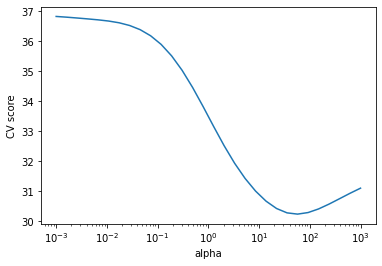

In [36]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, 3, 30)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=5)
searcher.fit(X_train[:1000], y_train[:1000])

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

---
Места откуда были сворованы коды:  
https://www.codecamp.ru/blog/pandas-count-missing-values/  
https://www.geeksforgeeks.org/add-column-to-pandas-dataframe-with-a-default-value/  
https://habr.com/ru/articles/663414/  
https://ru.stackoverflow.com/questions/786730/Удалить-строки-в-dataframe-удовлетворяющие-условию  
